# Laboratorio 5: Redes Neuronales Recurrentes (RNN) para Series de Tiempo

## Autores:

- Nelson García 22434
- Christian Echeverría 221



## Carga y exploración de datos:



Importar las librerías:

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

2025-09-01 17:27:10.052142: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cargamos los datos

In [2]:
df = pd.read_csv('./Datos/IPN31152N.csv')
df.head()

,observation_date,IPN31152N
0,1972-01-01,60.1519
1,1972-02-01,67.2727
2,1972-03-01,74.4700
3,1972-04-01,78.3594
4,1972-05-01,85.0321


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  642 non-null    object 
 1   IPN31152N         642 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


Se convierte la fecha de Object a DateTime

In [4]:
df = pd.read_csv('./Datos/IPN31152N.csv', 
                 index_col = 'observation_date', 
                 parse_dates = True)


In [5]:
df.head(20)


,IPN31152N
observation_date,
1972-01-01,60.1519
1972-02-01,67.2727
1972-03-01,74.4700
1972-04-01,78.3594
1972-05-01,85.0321
1972-06-01,100.9147
1972-07-01,100.4435
1972-08-01,96.6660
1972-09-01,86.0726


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 642 entries, 1972-01-01 to 2025-06-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  642 non-null    float64
dtypes: float64(1)
memory usage: 10.0 KB


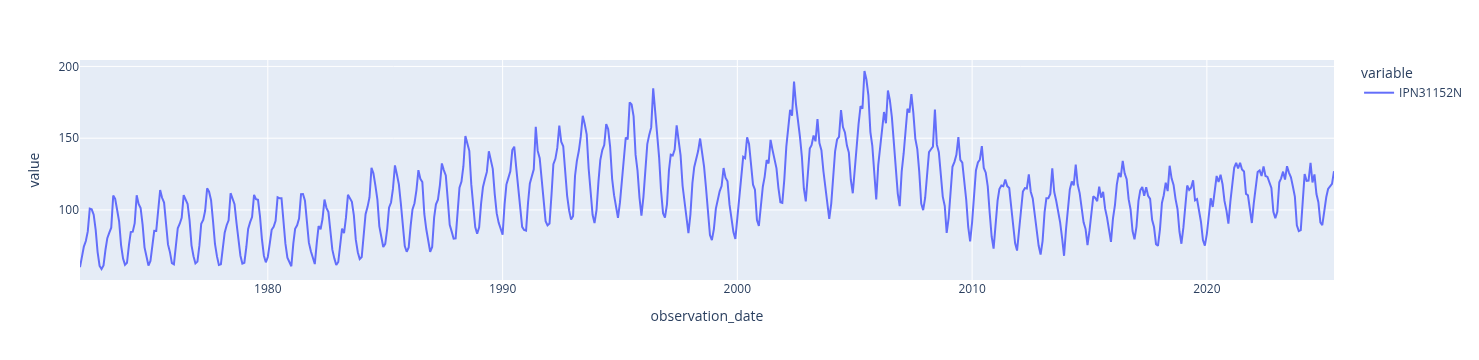

In [7]:
fig = px.line(df)
fig.show()

## División de conjuntos

In [8]:
len(df)

642

Vamos a tomar los últimos 24 meses para nuestro set de tests.

In [9]:
tamanio_prueba = 24

In [10]:
indice_prueba = len(df) - tamanio_prueba

In [11]:
entreno = df.iloc[: indice_prueba]
prueba = df.iloc[indice_prueba:]

In [12]:
entreno

,IPN31152N
observation_date,
1972-01-01,60.1519
1972-02-01,67.2727
1972-03-01,74.4700
1972-04-01,78.3594
1972-05-01,85.0321
...,...
2023-02-01,119.2751
2023-03-01,122.0175
2023-04-01,126.6790


In [13]:
prueba

,IPN31152N
observation_date,
2023-07-01,126.0569
2023-08-01,122.6748
2023-09-01,116.2177
2023-10-01,109.3279
2023-11-01,89.3353
2023-12-01,85.2839
2024-01-01,85.9573
2024-02-01,110.0548
2024-03-01,124.9787


## Normalización y preparación

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(entreno)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [16]:
datos_entreno_escalados = scaler.transform(entreno)
datos_prueba_escalados = scaler.transform(prueba)

## Generador de series de tiempo

In [17]:
longitud = 12
tamanio_tanda = 32
generador = TimeseriesGenerator(datos_entreno_escalados, 
                                datos_entreno_escalados,
                                length = longitud, 
                                batch_size = tamanio_tanda)

In [18]:
X,y = generador[0]

In [19]:
print(f'Dado el arreglo: \n{X.flatten()}')
print(f'Predecir esta y: \n {y}')

Dado el arreglo: 
[0.00946788 0.06107842 0.11324343 0.14143325 0.18979603 0.30491086
 0.30149567 0.27411688 0.19733743 0.08531309 0.01561334 0.
 0.06107842 0.11324343 0.14143325 0.18979603 0.30491086 0.30149567
 0.27411688 0.19733743 0.08531309 0.01561334 0.         0.01773913
 0.11324343 0.14143325 0.18979603 0.30491086 0.30149567 0.27411688
 0.19733743 0.08531309 0.01561334 0.         0.01773913 0.09849259
 0.14143325 0.18979603 0.30491086 0.30149567 0.27411688 0.19733743
 0.08531309 0.01561334 0.         0.01773913 0.09849259 0.15587533
 0.18979603 0.30491086 0.30149567 0.27411688 0.19733743 0.08531309
 0.01561334 0.         0.01773913 0.09849259 0.15587533 0.18355852
 0.30491086 0.30149567 0.27411688 0.19733743 0.08531309 0.01561334
 0.         0.01773913 0.09849259 0.15587533 0.18355852 0.20875425
 0.30149567 0.27411688 0.19733743 0.08531309 0.01561334 0.
 0.01773913 0.09849259 0.15587533 0.18355852 0.20875425 0.37144257
 0.27411688 0.19733743 0.08531309 0.01561334 0.         0.01

## Construcción del modelo

Tenemos 1 feature.

In [20]:
n_features = 1

In [21]:
modelo = Sequential()
modelo.add(LSTM(100, activation = 'relu', input_shape = (longitud, 
                                                         n_features)))
modelo.add(Dense(1))
modelo.compile(optimizer = 'adam', loss = 'mse')

I0000 00:00:1756769256.945911   25660 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1728 MB memory:  -> device: 0, name: NVIDIA GeForce MX150, pci bus id: 0000:02:00.0, compute capability: 6.1
/home/nelson/Documents/Uvg/Data Science/Lab5_DataScience/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [22]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

## Entranamiento:

In [23]:
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

In [24]:
generador_validacion = TimeseriesGenerator(datos_prueba_escalados,
                                           datos_prueba_escalados, 
                                           length = longitud, 
                                           batch_size = tamanio_tanda)

In [25]:
modelo.fit(generador, epochs = 20,
                    validation_data = generador_validacion,
                    callbacks = [detencion_temprana])

Epoch 1/20


/home/nelson/Documents/Uvg/Data Science/Lab5_DataScience/venv/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

2025-09-01 17:27:41.014607: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fe4400047c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-01 17:27:41.014622: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX150, Compute Capability 6.1
2025-09-01 17:27:41.279448: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-01 17:27:41.948224: I external/local_xla/xla/stream_executor/cuda/cuda_dnn

 1/19 ━━━━━━━━━━━━━━━━━━━━ 1:03 4s/step - loss: 0.3304

I0000 00:00:1756769263.268115   25775 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0710 - val_loss: 0.0112
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - val_loss: 0.0086
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - val_loss: 0.0079
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - val_loss: 0.0068
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - val_loss: 0.0061
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - val_loss: 0.0047
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - val_loss: 0.0025
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - val_loss: 0.0018
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - val_loss: 0.0057
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0093


In [26]:
perdidas = pd.DataFrame(modelo.history.history)

In [27]:
fig = px.line(perdidas)
fig.show()

## Evaluación

In [28]:
primera_tanda_eval = datos_entreno_escalados[-longitud:]

In [29]:
primera_tanda_eval = primera_tanda_eval.reshape((1, longitud, n_features))

In [30]:
modelo.predict(primera_tanda_eval)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


array([[0.3488837]], dtype=float32)

In [31]:
datos_prueba_escalados[0]

array([0.48713795])

In [32]:
predicciones_prueba = []

primera_tanda_eval = datos_entreno_escalados[-longitud:]
tanda_actual = primera_tanda_eval.reshape((1, longitud, n_features))

for i in range(len(prueba)):
    prediccion_actual = modelo.predict(tanda_actual)[0]

    predicciones_prueba.append(prediccion_actual) 
    
    tanda_actual = np.append(tanda_actual[:,1:,:],
                             [[prediccion_actual]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [33]:
predicciones_reales = scaler.inverse_transform(predicciones_prueba)

In [34]:
prueba['Predicciones'] = predicciones_reales

/tmp/ipykernel_25660/1226055985.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
prueba

,IPN31152N,Predicciones
observation_date,,
2023-07-01,126.0569,106.981710
2023-08-01,122.6748,102.414604
2023-09-01,116.2177,97.769668
2023-10-01,109.3279,93.354471
2023-11-01,89.3353,91.435796
2023-12-01,85.2839,91.754853
2024-01-01,85.9573,93.466865
2024-02-01,110.0548,95.705323
2024-03-01,124.9787,97.019563


In [36]:
fig = px.line(prueba)
fig.show()

## Entrenar de nuevo

In [37]:
escalador_completo = MinMaxScaler()
datos_completos_escalados = escalador_completo.fit_transform(df)

In [38]:
longitud = 12
tamanio_tanda = 32
generador = TimeseriesGenerator(datos_completos_escalados, 
                                datos_completos_escalados, 
                                length = longitud, 
                                batch_size = tamanio_tanda)

In [39]:
modelo = Sequential()
modelo.add(LSTM(100, activation = 'relu', input_shape = (longitud, 
                                                         n_features)))
modelo.add(Dense(1))
modelo.compile(optimizer = 'adam', loss = 'mse')


/home/nelson/Documents/Uvg/Data Science/Lab5_DataScience/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [40]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# ajustar el modelo
modelo.fit(generador, epochs = 3)

Epoch 1/3


/home/nelson/Documents/Uvg/Data Science/Lab5_DataScience/venv/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0918 
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0225
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217


In [42]:
pronostico = []

periodos = 642

primera_tanda_eval = datos_completos_escalados[-longitud:]
tanda_actual = primera_tanda_eval.reshape((1, longitud, n_features))

for i in range(periodos):
    
    prediccion_actual = modelo.predict(tanda_actual)[0]
    
    pronostico.append(prediccion_actual) 
    
    tanda_actual = np.append(tanda_actual[:,1:,:],
                             [[prediccion_actual]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [43]:
pronostico = scaler.inverse_transform(pronostico)

## Creando un nuevo índice de fechas

In [44]:
df

,IPN31152N
observation_date,
1972-01-01,60.1519
1972-02-01,67.2727
1972-03-01,74.4700
1972-04-01,78.3594
1972-05-01,85.0321
...,...
2025-02-01,108.9906
2025-03-01,114.5922
2025-04-01,116.9527


In [45]:
indice_pronostico = pd.date_range(start='1972-01-01', 
                                  periods = periodos,
                                  freq = 'MS')

In [46]:
df_pronostico = pd.DataFrame(data = pronostico,
                             index = indice_pronostico,
                             columns = ['Pronostico'])

In [47]:
df_pronostico

,Pronostico
1972-01-01,114.921068
1972-02-01,114.500686
1972-03-01,113.755034
1972-04-01,113.544090
1972-05-01,113.641854
...,...
2025-02-01,120.526178
2025-03-01,120.526178
2025-04-01,120.526178
2025-05-01,120.526178


In [48]:
fig = px.line(df)
fig.show()

In [49]:
fig = px.line(df_pronostico)
fig.show()

In [50]:
fig = px.line(df)
fig2 = px.line(df_pronostico)
fig2.update_traces(line = dict(color = 'orange'))
fig.add_trace(fig2.data[0])
fig.update_layout(width = 500, height = 400)
fig.show()

In [51]:
fig = px.line(df)
fig2 = px.line(df_pronostico)
fig2.update_traces(line=dict(color = 'orange'))
fig.add_trace(fig2.data[0])
fig.update_layout(width = 500, height = 400,
                 xaxis_range = ['1972-01-01','2026-06-01'])
fig.show()